In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
df:pd.DataFrame=pd.read_excel('销售数据.xlsx',names=
['date','A','B','C','D'])
df.head()


,date,A,B,C,D
0,2019-12-01,8087,5923,9299,6287
1,2019-12-02,7851,5617,8984,6078
2,2019-12-03,4679,5481,8461,6735
3,2019-12-04,4296,6473,8407,1749
4,2019-01-04,7875,1688,5371,6377


In [3]:
df_melt:pd.DataFrame=df.melt(
    id_vars=['date'],var_name='district',
    value_name='sales'
)
df_melt

,date,district,sales
0,2019-12-01,A,8087
1,2019-12-02,A,7851
2,2019-12-03,A,4679
3,2019-12-04,A,4296
4,2019-01-04,A,7875
5,2019-01-05,A,7271
6,2019-01-06,A,9299
7,2019-01-07,A,1749
8,2019-03-08,A,3196
9,2019-03-09,A,1220


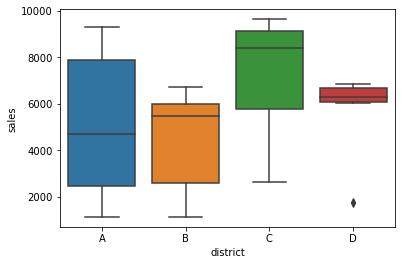

In [4]:
sns.boxplot(data=df_melt,x='district',y='sales')

In [5]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


In [6]:
# 销量是否和地区有关？
model=ols('sales~C(district)',data=df_melt.iloc[:,1:]).fit()
anova_table=anova_lm(model,typ=2)
anova_table


,sum_sq,df,F,PR(>F)
C(district),5.789457e+07,3.0,3.466424,0.024913
Residual,2.226870e+08,40.0,NaN,NaN


p值小于0.05，拒绝原假设，销量和地区有关。

In [7]:
df['date']=pd.to_datetime(df['date'])
df['month']=df['date'].dt.month
df.head()


,date,A,B,C,D,month
0,2019-12-01,8087,5923,9299,6287,12
1,2019-12-02,7851,5617,8984,6078,12
2,2019-12-03,4679,5481,8461,6735,12
3,2019-12-04,4296,6473,8407,1749,12
4,2019-01-04,7875,1688,5371,6377,1


In [9]:
df_melt:pd.DataFrame=df.melt(
    id_vars=['date','month'],var_name='district',
    value_name='sales'
)
df_melt


,date,month,district,sales
0,2019-12-01,12,A,8087
1,2019-12-02,12,A,7851
2,2019-12-03,12,A,4679
3,2019-12-04,12,A,4296
4,2019-01-04,1,A,7875
5,2019-01-05,1,A,7271
6,2019-01-06,1,A,9299
7,2019-01-07,1,A,1749
8,2019-03-08,3,A,3196
9,2019-03-09,3,A,1220


In [10]:
df_melt['month']=df_melt['month'].map(
    {
        12:'Dec',1:'Jan',3:'March'
    }
)
df_melt

,date,month,district,sales
0,2019-12-01,Dec,A,8087
1,2019-12-02,Dec,A,7851
2,2019-12-03,Dec,A,4679
3,2019-12-04,Dec,A,4296
4,2019-01-04,Jan,A,7875
5,2019-01-05,Jan,A,7271
6,2019-01-06,Jan,A,9299
7,2019-01-07,Jan,A,1749
8,2019-03-08,March,A,3196
9,2019-03-09,March,A,1220


In [11]:
# 销量和月份是否有关
model=ols('sales~C(month)',data=df_melt).fit()
anova_table=anova_lm(model,typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(month),2.905587e+07,2.0,2.368129,0.106347
Residual,2.515257e+08,41.0,NaN,NaN


 p值大于0.05，不能拒绝原假设，不能
 认为两者存在关系

In [12]:
# 销量是否与月份和地区有关
formula='sales~C(month)*C(district)'
model=ols(formula,df_melt).fit()
anova_table=anova_lm(model,typ=2)
anova_table


,sum_sq,df,F,PR(>F)
C(month),2.905587e+07,2.0,3.308351,0.049431
C(district),5.789457e+07,3.0,4.394649,0.010665
C(month):C(district),5.310978e+07,6.0,2.015723,0.092460
Residual,1.405214e+08,32.0,NaN,NaN


  p值大于0.05，不能拒绝原假设
  不能认为两者相关